In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [11]:
#第一个拿到的数据集
data = pd.read_csv('bike.csv')
data.head()


,id,unique_id,car_id,bike_type,time,lat,lng,center,distance,createdAt,updatedAt
0,200809,8621230846_3117773_12142354,8621230846,1,2017-08-12 13:48:16.091186+08,31.177730,121.423548,0101000020E6100000FB6D53671B5B5E40D49F9BB87F2D...,86,2017-08-12 13:48:16.091186+08,2017-08-12 13:48:16.091186+08
1,171060,0216787333_3123060_12133998,216787333,1,2017-08-12 16:15:42.647204+08,31.230604,121.339990,0101000020E6100000F7DC1F65C2555E40830FACD8083B...,55,2017-08-12 13:46:13.251187+08,2017-08-12 16:15:42.647204+08
2,10090,0216124607_3118200_12142685,216124607,2,2017-08-12 14:00:55.75919+08,31.182005,121.426855,0101000020E61000006B496396515B5E40976C09DA972E...,85,2017-08-12 13:35:28.25134+08,2017-08-12 14:00:55.75919+08
3,201095,0210073741_3127465_12151786,210073741,1,2017-08-12 15:51:44.216796+08,31.274651,121.517861,0101000020E6100000CD42B1A124615E40A0513F8C4F46...,13,2017-08-12 13:48:17.35929+08,2017-08-12 15:51:44.216796+08
4,286862,0216080576_3127588_12157902,216080576,2,2017-08-12 17:51:23.466872+08,31.275883,121.579024,0101000020E61000007556BFB80E655E4051AAC444A046...,85,2017-08-12 13:54:23.377769+08,2017-08-12 17:51:23.466872+08


In [14]:
type(data.time[0])

str

In [17]:
data2 = pd.read_csv('/Users/valarian/Downloads/单车数据/曲阜数据/6-13/qufu_613_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
data2.head()

,bid,lat,lng,time
0,5316539202,35.581516,116.955997,2017-6-12 17:01:59
1,100238996,35.581515,117.035588,2017-6-12 17:01:09
2,100229780,35.597192,116.985388,2017-6-12 17:02:12
3,100127704,35.591542,117.057173,2017-6-12 17:02:56
4,100241266,35.591577,117.041885,2017-6-12 17:40:02


In [18]:
d = pd.Series([int(x.split('-')[-1].split(' ')[0]) for x in data2.time])
data2['day'] = d


No handles with labels found to put in legend.


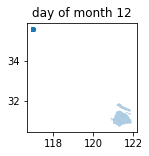

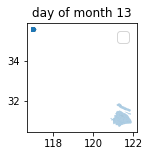

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline
city_map = gpd.read_file('/Users/valarian/SJTU/SJTU/Data/shanghaitown/shanghaitown.shp')
geometry = [Point(xy) for xy in zip(data2.lng, data2.lat)]
geo_df = gpd.GeoDataFrame(data2, geometry = geometry)
#fig, ax = plt.subplots(10,3,figsize = (15,60))
days = set(geo_df['day'])
for i in days:
    fig, ax = plt.subplots(1,1,figsize = (2,2))
    city_map.plot(ax = ax, alpha = 0.4)#, alpha = 0.4, color = 'grey')
    geo_df[geo_df['day'] == i].plot(ax =ax, markersize = 0.2)
    ax.set_title('day of month '+str(i))


# city_map.plot(ax = ax[i], alpha = 0.4)#, alpha = 0.4, color = 'grey')
# geo_df[geo_df['hour'] == i].plot(ax =ax[i], markersize = 0.2)
# ax[i].set_title(i+1)
plt.savefig('eachday.png')
plt.legend(prop={'size':15})

In [35]:
single = data[data.car_id == 216787333].sort_values(by = 'createdAt')
single

,id,unique_id,car_id,bike_type,time,lat,lng,center,distance,createdAt,updatedAt
1,171060,0216787333_3123060_12133998,216787333,1,2017-08-12 16:15:42.647204+08,31.230604,121.339990,0101000020E6100000F7DC1F65C2555E40830FACD8083B...,55,2017-08-12 13:46:13.251187+08,2017-08-12 16:15:42.647204+08
367890,1587650,0216787333_3123069_12133997,216787333,1,2017-08-12 15:58:08.865352+08,31.230697,121.339972,0101000020E6100000EBAB7D19C2555E40496219F10E3B...,56,2017-08-12 15:30:25.468982+08,2017-08-12 15:58:08.865352+08
953233,5647440,0216787333_3123061_12133971,216787333,1,2017-08-13 01:34:42.023951+08,31.230618,121.339710,0101000020E61000006FA049D0BD555E40AC4894CB093B...,81,2017-08-12 21:29:16.136673+08,2017-08-13 01:34:42.023951+08


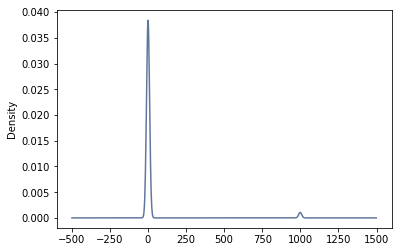

In [14]:
data.bike_type.plot(kind = 'kde')

In [ ]:
import random

from pyecharts import options as opts
from pyecharts.charts import HeatMap
from pyecharts.render import make_snapshot

def heatmap_base() -> HeatMap:
    value = [[i, j, random.randint(0, 50)] for i in range(24) for j in range(7)]
    print(value)
    c = (
        HeatMap()
        .add_xaxis(list(range(24)))
        .add_yaxis("series0", list(range(7)), value)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="HeatMap-基本示例"),
            visualmap_opts=opts.VisualMapOpts(),
        )
    )
    return c
graph = heatmap_base()
graph.render_notebook()
make_snapshot(graph.render(), 'graph.png', browser = 'Safari')

In [4]:
# coding=utf-8
import random

from example.commons import Collector, Faker
from pyecharts import options as opts
from pyecharts.charts import HeatMap, Page

C = Collector()


@C.funcs
def heatmap_base() -> HeatMap:
    value = [[i, j, random.randint(0, 50)] for i in range(24) for j in range(7)]
    c = (
        HeatMap()
        .add_xaxis(Faker.clock)
        .add_yaxis("series0", Faker.week, value)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="HeatMap-基本示例"),
            visualmap_opts=opts.VisualMapOpts(),
        )
    )
    return c


Page().add(*[fn() for fn, _ in C.charts]).render()

ModuleNotFoundError: No module named 'example.commons'

In [ ]:
from pyecharts.charts import Bar
from pyecharts.render import make_snapshot

bar = (
    Bar()
    .add_xaxis(["衬衫", "羊毛衫", "雪纺衫", "裤子", "高跟鞋", "袜子"])
    .add_yaxis("商家A", [5, 20, 36, 10, 75, 90])
)
bar.render_notebook()


In [1]:
#测试buffer功能
import pandas as pd
import geopandas as gpd
from shapely import geos
from shapely.geometry import Point
import fiona
import matplotlib.pyplot as plt
from fiona.crs import from_epsg,from_string

In [2]:
shanghai_map = gpd.GeoDataFrame.from_file('/Users/valarian/SJTU/SJTU/Data/data/shanghaitown/shanghaitown.shp', encoding = 'gbk') #读取shapfile数据为geodataframe格式

In [4]:
shanghai_map['ID'] = list(range(333))

In [ ]:
smap = gpd.GeoDataFrame(shanghai_map[['ID','geometry']])
smap

In [3]:
poi = pd.read_csv('/Users/valarian/Downloads/上海市poi.csv', names = ['name', 'address', 'lat', 'lng', 'district', 'type'], usecols = [1,2,3,4,5,6], skiprows =1)
poi = poi[(poi.lat>31.107806) & (poi.lat<31.372450) & (poi.lng>121.3250) & (poi.lng<121.661750)]
#poi = poi.head()
poi.head()

,name,address,lat,lng,district,type
3,南汇・界浜水蜜桃基地,沔新路与申瓦路交叉口南150米,31.131025,121.638202,上海市;浦东新区,公司企业;公司企业
4,阳山水蜜桃,桃浦镇真南路822弄温欣旅馆旁,31.283939,121.380621,上海市;普陀区,购物;超市
5,无锡阳山水蜜桃,上海大学(延长校区),31.275961,121.452373,上海市;静安区,购物;超市
7,游船码头,宜川路99号,31.262445,121.436216,上海市;普陀区,交通运输;港口码头
8,外滩浦江游船码头[公交站],都市观光旅游1线,31.231722,121.490171,上海市;黄浦区,基础设施;公交车站


In [4]:
bike = pd.read_csv('/Users/valarian/Downloads/单车数据/ofo_car_6-19_7-3/ofo_car_73_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
#bike = bike.head()
bike = bike[:100000]
bike.head()

,bid,lat,lng,time
0,gYzr63,31.116237,121.460843,2017-6-25 05:56:34
1,OaPVya,31.177473,121.461874,2017-6-28 11:02:47
2,G4q2zn,31.188881,121.434155,2017-6-28 11:04:08
3,zmzPDv,31.278181,121.488364,2017-6-28 11:03:31
4,8L2EMN,31.162976,121.537148,2017-6-28 11:04:04


In [6]:
def point_to_geo(df,lon,lat):
    df['geometry'] = list(zip(df.lng,df.lat)) #识别经纬度，转换点数据
    df['geometry'] = df['geometry'].apply(Point)
    df = gpd.GeoDataFrame(df, geometry = 'geometry') #转换Geodataframe格式
    df.crs = {'init':'epsg:4326'} #定义坐标系WGS84
#     del df[lon]
#     del df[lat]
    return df
bike = point_to_geo(bike,'lng','lat') #转换Geodataframe格式
poi = point_to_geo(poi,'lng','lat') #转换Geodataframe格式
bike.head()

,bid,lat,lng,time,geometry
0,gYzr63,31.116237,121.460843,2017-6-25 05:56:34,POINT (121.4608425564 31.1162372504)
1,OaPVya,31.177473,121.461874,2017-6-28 11:02:47,POINT (121.4618740421 31.1774733547)
2,G4q2zn,31.188881,121.434155,2017-6-28 11:04:08,POINT (121.4341549911 31.1888813527)
3,zmzPDv,31.278181,121.488364,2017-6-28 11:03:31,POINT (121.4883640027 31.2781808756)
4,8L2EMN,31.162976,121.537148,2017-6-28 11:04:04,POINT (121.5371476237 31.1629760742)


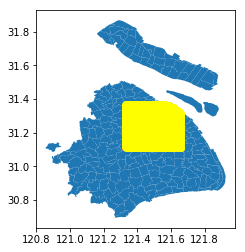

In [7]:
base = shanghai_map.plot()
bike.plot(ax = base, color = 'red', alpha = 0.5)
poi.plot(ax = base, color = 'yellow', alpha = 0.5)

In [50]:
#投影变换
def wgs84_to_CGCS2000(df,code):
    result = df.to_crs(from_epsg(code))
    return result

#shanghai_map_pcs = wgs84_to_CGCS2000(shanghai_map,4549)
poi_pcs = wgs84_to_CGCS2000(poi,4326)
bike_pcs = wgs84_to_CGCS2000(bike,4326)

In [51]:
poi_pcs.head()

,name,address,lat,lng,district,type,geometry
3,南汇・界浜水蜜桃基地,沔新路与申瓦路交叉口南150米,31.131025,121.638202,上海市;浦东新区,公司企业;公司企业,POINT (121.638202288 31.1310247773)
4,阳山水蜜桃,桃浦镇真南路822弄温欣旅馆旁,31.283939,121.380621,上海市;普陀区,购物;超市,POINT (121.380621141 31.2839387633)
5,无锡阳山水蜜桃,上海大学(延长校区),31.275961,121.452373,上海市;静安区,购物;超市,POINT (121.452372807 31.2759608603)
7,游船码头,宜川路99号,31.262445,121.436216,上海市;普陀区,交通运输;港口码头,POINT (121.436215602 31.26244453090001)
8,外滩浦江游船码头[公交站],都市观光旅游1线,31.231722,121.490171,上海市;黄浦区,基础设施;公交车站,POINT (121.490171414 31.2317220192)


In [52]:
bike_pcs.head()

,bid,lat,lng,time,geometry
0,gYzr63,31.116237,121.460843,2017-6-25 05:56:34,POINT (121.4608425564 31.1162372504)
1,OaPVya,31.177473,121.461874,2017-6-28 11:02:47,POINT (121.4618740421 31.17747335469999)
2,G4q2zn,31.188881,121.434155,2017-6-28 11:04:08,POINT (121.4341549911 31.1888813527)
3,zmzPDv,31.278181,121.488364,2017-6-28 11:03:31,POINT (121.4883640027 31.2781808756)
4,8L2EMN,31.162976,121.537148,2017-6-28 11:04:04,POINT (121.5371476237 31.1629760742)


In [ ]:
base = shanghai_map.plot(color='lightyellow',edgecolor='black',figsize=(15, 15)) #画底图
poi_pcs.plot(ax=base,marker='o', color='green', markersize=30) #在底图上叠加餐厅点数据
bike_pcs.plot(ax=base,marker='o', color='red', markersize=30) #在底图上叠加房源点数据
# plt.gca().xaxis.set_major_locator(plt.NullLocator())#去掉x轴刻度
# plt.gca().yaxis.set_major_locator(plt.NullLocator())#去掉y轴刻度
plt.savefig('./map.png',dpi=400) #保存图片


In [26]:
poi_buffer = poi.buffer(0.001) #建立一公里缓冲区

In [ ]:
#house_data_buffer.head()
base = shanghai_map.plot(color='lightyellow',edgecolor='black',figsize=(15, 15))
poi_buffer.plot(ax = base, color='blue', markersize=5,alpha=0.1)
bike.plot(ax = base, color = 'red', markersize = 20)
# plt.gca().xaxis.set_major_locator(plt.NullLocator()) #去掉x轴刻度
# plt.gca().yaxis.set_major_locator(plt.NullLocator()) #去年y轴刻度
plt.savefig('./map2.png',dpi=400) #保存图片


In [48]:
poi_buffer = wgs84_to_CGCS2000(poi_buffer,4549)

In [ ]:
# poi_df = gpd.GeoDataFrame({'geometry': poi_buffer})
poi_df = gpd.GeoDataFrame(poi)
poi_df['geometry'] = poi_buffer
poi_df.head()

In [ ]:
temp = gpd.sjoin(shanghai_map, bike, how = 'right', op = 'contains')
temp.head()


In [28]:
temp = gpd.sjoin(poi_df, bike, how = 'left', op = 'contains')
temp.head()

/Users/valarian/python/miniconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,name,address,lat_left,lng_left,district,type,geometry,index_right,bid,lat_right,lng_right,time
3,南汇・界浜水蜜桃基地,沔新路与申瓦路交叉口南150米,31.131025,121.638202,上海市;浦东新区,公司企业;公司企业,"POLYGON ((121.6492010834562 31.13107384497433,...",NaN,NaN,NaN,NaN,NaN
4,阳山水蜜桃,桃浦镇真南路822弄温欣旅馆旁,31.283939,121.380621,上海市;普陀区,购物;超市,"POLYGON ((121.3916199364562 31.28398783097434,...",73821.0,Nal0VG,31.280170,121.375093,2017-6-26 10:19:56
4,阳山水蜜桃,桃浦镇真南路822弄温欣旅馆旁,31.283939,121.380621,上海市;普陀区,购物;超市,"POLYGON ((121.3916199364562 31.28398783097434,...",74144.0,yLoaPG,31.280199,121.375093,2017-6-25 07:08:40
4,阳山水蜜桃,桃浦镇真南路822弄温欣旅馆旁,31.283939,121.380621,上海市;普陀区,购物;超市,"POLYGON ((121.3916199364562 31.28398783097434,...",59318.0,lrlKY0,31.280534,121.370264,2017-6-28 11:12:47
4,阳山水蜜桃,桃浦镇真南路822弄温欣旅馆旁,31.283939,121.380621,上海市;普陀区,购物;超市,"POLYGON ((121.3916199364562 31.28398783097434,...",95267.0,6eZAAr,31.280780,121.371485,2017-6-26 02:19:59


In [47]:
sum(town_join.bid)

0

In [ ]:
town_join = temp.groupby(['name']).count() #聚合计算个数
town_join

In [29]:
poi_join = temp.groupby(['name']).count() #聚合计算个数
poi_join.head()

,address,lat_left,lng_left,district,type,geometry,index_right,bid,lat_right,lng_right,time
name,,,,,,,,,,,
莫泰168旅店(上海南站上师大店),629,629,629,629,629,629,629,626,629,629,629
!STRICTLY STUDIO,1117,1117,1117,1117,1117,1117,1117,1103,1117,1117,1117
&F奢侈品养护中心(嘉杰国际广场),1799,1799,1799,1799,1799,1799,1799,1781,1799,1799,1799
(奔驰中心店),342,342,342,342,342,342,342,338,342,342,342
(支持早餐)五芳斋(新港路店),1276,1276,1276,1276,1276,1276,1276,1269,1276,1276,1276


In [26]:
result = pd.merge(shanghai_map, town_join, left_on = 'ID', right_on = 'ID', how = 'left')
result.rename(columns = {'geometry_x':'geometry'}, inplace = True)
result = result.fillna(0)


In [30]:
result = pd.merge(poi, poi_join, left_on = 'name', right_on = 'name', how = 'left')
result.head()

,name,address_x,lat,lng,district_x,type_x,geometry_x,address_y,lat_left,lng_left,district_y,type_y,geometry_y,index_right,bid,lat_right,lng_right,time
0,南汇・界浜水蜜桃基地,沔新路与申瓦路交叉口南150米,31.131025,121.638202,上海市;浦东新区,公司企业;公司企业,"POLYGON ((121.6492010834562 31.13107384497433,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,阳山水蜜桃,桃浦镇真南路822弄温欣旅馆旁,31.283939,121.380621,上海市;普陀区,购物;超市,"POLYGON ((121.3916199364562 31.28398783097434,...",175.0,175.0,175.0,175.0,175.0,175.0,175.0,173.0,175.0,175.0,175.0
2,无锡阳山水蜜桃,上海大学(延长校区),31.275961,121.452373,上海市;静安区,购物;超市,"POLYGON ((121.4633716024562 31.27600992797434,...",1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1063.0,1075.0,1075.0,1075.0
3,游船码头,宜川路99号,31.262445,121.436216,上海市;普陀区,交通运输;港口码头,"POLYGON ((121.4472143974562 31.26249359857434,...",963.0,963.0,963.0,963.0,963.0,963.0,963.0,955.0,963.0,963.0,963.0
4,外滩浦江游船码头[公交站],都市观光旅游1线,31.231722,121.490171,上海市;黄浦区,基础设施;公交车站,"POLYGON ((121.5011702094562 31.23177108687434,...",1582.0,1582.0,1582.0,1582.0,1582.0,1582.0,1582.0,1570.0,1582.0,1582.0,1582.0


In [31]:
result.rename(columns = {'geometry_x':'geometry'}, inplace = True)
result = result.fillna(0)

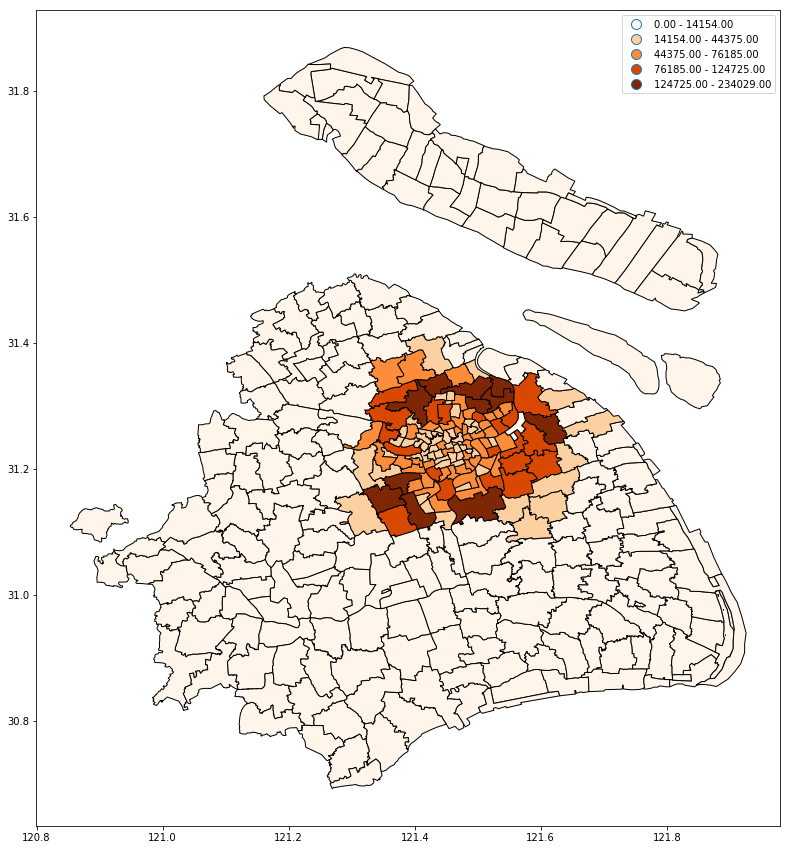

In [30]:
#按城镇统计
result.plot(column = 'X_y', cmap = 'Oranges', scheme = 'fisher_jenks', legend = True, \
           edgecolor = 'black', figsize = (15,15))
plt.savefig('./town.png',dpi=400) 


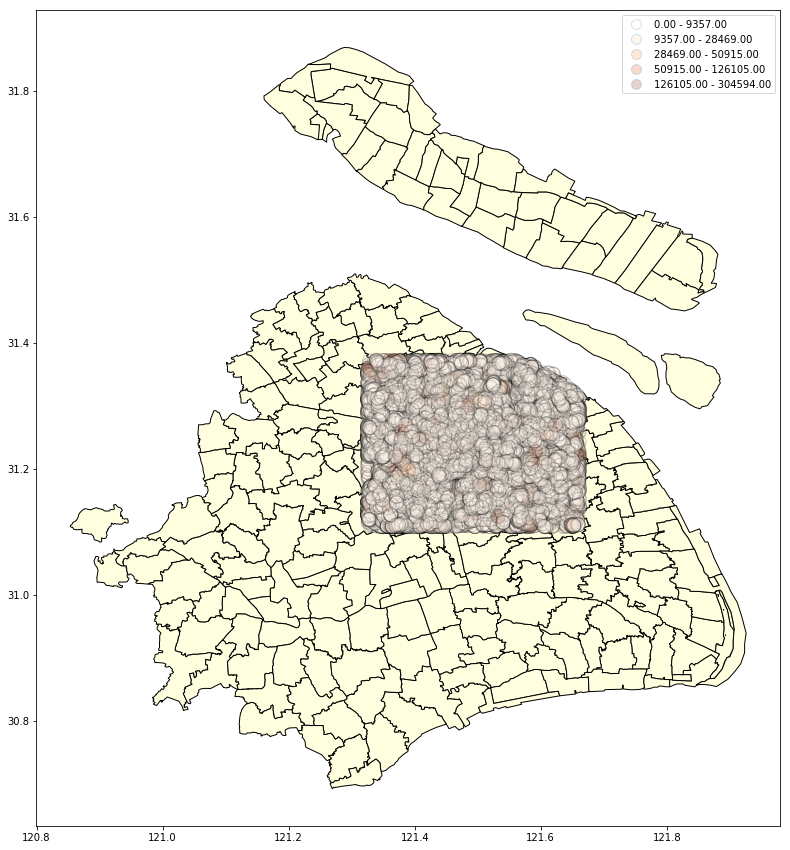

In [32]:
#按城poi统计
base = shanghai_map.plot(color='lightyellow',edgecolor='black',figsize=(15, 15))
result.plot(ax = base, column = 'lat_left', cmap = 'Oranges', scheme = 'fisher_jenks', legend = True, \
           edgecolor = 'black', figsize = (15,15), alpha = 0.2)
plt.savefig('./poi2.png',dpi=400) 

In [ ]:
shanghai_result = wgs84_to_CGCS2000(shanghai_result,4326) #转换成地理坐标系
shanghai_result.columns = ['town','region','geometry','restaurant_count'] #更改列名为英文，因为数据保存对中文支持不佳
buffer_result = wgs84_to_CGCS2000(buffer_result,4326) #转换成地理坐标系

shanghai_result.to_csv('./result/shanghai_result.csv') #保存成csv
shanghai_result.to_file('./result/shanghai_result.shp') #保存成shapfile
buffer_result.to_csv('./result/buffer_result.csv') #保存成csv
buffer_result.to_file('./result/buffer_result.shp') #保存成shapfile


In [ ]:
bod = bike[:100000]
for 